# Procesamiento de Información 2023
## Unidad 2 - Tarea 2B (Corrección)
### David Aarón Ramírez Olmeda

### Introducción:
En el análisis de textos, descubrir asociaciones de palabras significativas puede proporcionar información valiosa sobre los patrones y temas presentes en un conjunto de datos. En este documento, se aborda el problema de encontrar las asociaciones de palabras más importantes utilizando la medida de información mutua. Se procesarán conjuntos de datos separados de tweets para México, España y Venezuela, y se aplicará un preprocesamiento adecuado para obtener resultados precisos.

### Desarrollo:
En primer lugar, se realizó un preprocesamiento de los datos para eliminar elementos irrelevantes como URLs, menciones de usuarios, hashtags, puntuación y palabras vacías. Además, se redujeron las secuencias de caracteres repetidos para reducir el vocabulario. Luego se utilizaron las bibliotecas adecuadas para leer los archivos JSON que contienen los tweets y extraer los textos relevantes.

In [1]:
import json
import string
import re
from nltk.corpus import stopwords
from nltk import bigrams
from collections import defaultdict
from math import log2
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Antes de realizar el cálculo de frecuencias y la extracción de secuencias de palabras, es necesario preprocesar los datos. Para ello, se deben llevar a cabo las siguientes tareas: convertir todos los textos a minúsculas, eliminar los acentos, la puntuación y las stopwords (palabras que no aportan contenido significativo). También se deben eliminar las URLs, los usuarios mencionados con el formato @xxxx y las etiquetas de hashtag con el formato #xxxxx.

Dado que los datos consisten en textos informales, es probable que existan errores ortográficos y repeticiones innecesarias de caracteres, como por ejemplo la palabra "bueeeeeno" en lugar de "bueno". Es recomendable reducir las secuencias de signos repetidos, de manera que la palabra "bueeeeeeno" se convierta en "bueeno", manteniendo únicamente dos caracteres repetidos consecutivos. Esto contribuirá a reducir el tamaño del vocabulario utilizado.

In [2]:
# Función para limpiar y preprocesar los tweets
def preprocess_tweet(tweet):
    tweet = tweet.lower()  # Convertir a minúsculas
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)  # Eliminar URLs
    tweet = re.sub(r"@\w+|\#", "", tweet)  # Eliminar menciones de usuario y hashtags
    tweet = re.sub(r"[^\w\s]", "", tweet)  # Eliminar puntuación
    tweet = re.sub(r"\s+", " ", tweet)  # Eliminar espacios en blanco adicionales
    tweet = re.sub(r"(.)\1+", r"\1\1", tweet)  # Reducir caracteres repetidos
    return tweet.strip()

Dado que son textos cortos, usar una ventana de 2 palabras, para calcular las probabilidades conjuntas p(x,  y)

In [3]:
# Función para calcular la información mutua
def calculate_mutual_information(x, y, freq_x, freq_y, freq_xy, corpus_size):
    p_x = freq_x[x] / corpus_size
    p_y = freq_y[y] / corpus_size
    p_xy = freq_xy[(x, y)] / corpus_size
    mutual_information = log2(p_xy / (p_x * p_y))
    return mutual_information

A partir de estas probabilidades, se calculó la información mutua para todas las combinaciones posibles de palabras. Posteriormente, se seleccionaron las 50 asociaciones de palabras más importantes según su índice de información mutua.

In [4]:
# Leer el archivo JSON y procesar los tweets
def process_tweets(filename):
    tweets = []
    unique_words = set()
    freq_unigrams = defaultdict(int)
    freq_bigrams = defaultdict(int)
    
    # Cargar y procesar los tweets
    with open(filename, "r", encoding="utf-8") as file:
        for line in file:
            tweet = json.loads(line)
            text = preprocess_tweet(tweet["text"])
            tweets.append(text)
            words = text.split()
            
            # Actualizar frecuencias de unigramas y bigramas
            for word in words:
                freq_unigrams[word] += 1
                unique_words.add(word)
            
            bigrams_list = list(bigrams(words))
            for bigram in bigrams_list:
                freq_bigrams[bigram] += 1
    
    # Filtrar palabras infrecuentes y stopwords
    filtered_words = [word for word in unique_words if freq_unigrams[word] > 5
                      and word not in stopwords.words('spanish')]
    
    # Calcular la información mutua para cada bigrama
    mutual_information_scores = []
    corpus_size = len(tweets)
    
    for bigram in freq_bigrams:
        x, y = bigram
        mutual_information = calculate_mutual_information(x, y, freq_unigrams, freq_unigrams, freq_bigrams, corpus_size)
        mutual_information_scores.append((bigram, mutual_information))
    
    # Ordenar las asociaciones por información mutua y seleccionar las 50 más importantes
    mutual_information_scores.sort(key=lambda x: x[1], reverse=True)
    top_associations = mutual_information_scores[:50]
    
    return top_associations

In [5]:
# Procesar el conjunto de datos de México
mexico_associations = process_tweets("MX_1M.json")

# Procesar el conjunto de datos de España
spain_associations = process_tweets("ES_1M.json")

# Procesar el conjunto de datos de Venezuela
venezuela_associations = process_tweets("VE_300K.json")

In [6]:
# Imprimir las 50 asociaciones más importantes para México
print("Asociaciones más importantes para México:")
print("=" * 50)
for association, mutual_information in mexico_associations:
    print(f"({association[0]}, {association[1]}): {mutual_information}")

Asociaciones más importantes para México:
(rapiñaúnica, alternativano): 19.931568569324174
(mamadito, comiendole): 19.931568569324174
(incitadora, vandalizara): 19.931568569324174
(cabronque, especialesjaatus): 19.931568569324174
(prateep, kochabua): 19.931568569324174
(horrorart, horrorstories): 19.931568569324174
(inalambricas, pmtp): 19.931568569324174
(dietes, iridioides): 19.931568569324174
(pilatiña, lavándo): 19.931568569324174
(peluchela, escueli): 19.931568569324174
(fm_studiosgdl, massiveatack): 19.931568569324174
(massiveatack, ludwigdrumshq): 19.931568569324174
(ludwigdrumshq, aquarian_lati): 19.931568569324174
(bestfans, rickymelendezofficial): 19.931568569324174
(bmwx5m, bmwseminueva): 19.931568569324174
(bmwseminueva, x5seminueva): 19.931568569324174
(conejoenlaluna, tochtli): 19.931568569324174
(l05, p4n15t45): 19.931568569324174
(p4n15t45, 50n): 19.931568569324174
(braggamx, rnbmusic): 19.931568569324174
(rnbmusic, urbanmusic): 19.931568569324174
(urbanmusic, musicprod

In [7]:
# Imprimir las 50 asociaciones más importantes para España
print("Asociaciones más importantes para España:")
print("=" * 50)
for association, mutual_information in spain_associations:
    print(f"({association[0]}, {association[1]}): {mutual_information}")

Asociaciones más importantes para España:
(sigarilios, pareser): 19.931568569324174
(gelo, vicentgelo): 19.931568569324174
(rivier, stroomt): 19.931568569324174
(blij, natuur): 19.931568569324174
(indiapone, italiaq): 19.931568569324174
(atrapatsaquí, aturemlacorba): 19.931568569324174
(mírico, luiterr): 19.931568569324174
(blackmamba, mambamondays): 19.931568569324174
(mambamondays, kobeeterno): 19.931568569324174
(vídii, amachate): 19.931568569324174
(homebox, keypad): 19.931568569324174
(esgremi, 191219): 19.931568569324174
(negosioos, susioss): 19.931568569324174
(marcadamente, frivolos): 19.931568569324174
(economistasel, fmiafirma): 19.931568569324174
(dentrenadors, fcf): 19.931568569324174
(emepez, elenagraciag): 19.931568569324174
(naviidaad, ajjajajaaj): 19.931568569324174
(luniverso, obbedisce): 19.931568569324174
(obbedisce, allamore): 19.931568569324174
(médiques, enfermerxes): 19.931568569324174
(enfermerxes, farmacéutiques): 19.931568569324174
(𝖳𝗈𝖽𝗈, 𝗅𝗈): 19.9315685693241

In [8]:
# Imprimir las 50 asociaciones más importantes para Venezuela
print("Asociaciones más importantes para Venezuela:")
print("=" * 50)
for association, mutual_information in venezuela_associations:
    print(f"({association[0]}, {association[1]}): {mutual_information}")

Asociaciones más importantes para Venezuela:
(buebos, trincaos): 18.51000303577161
(withoufilter, naturalligth): 18.51000303577161
(naturalligth, luznatural): 18.51000303577161
(muchasgracias, thankyou): 18.51000303577161
(thankyou, dankeshön): 18.51000303577161
(dankeshön, jevousremercie): 18.51000303577161
(michili, petlover): 18.51000303577161
(audionoticias, 01032020de): 18.51000303577161
(onusida, 2014todas): 18.51000303577161
(zerodiscrimination, discriminacióncero): 18.51000303577161
(antonellaniñalinda, consuprimarecuerdos): 18.51000303577161
(439, 551): 18.51000303577161
(551, 668): 18.51000303577161
(668, 756): 18.51000303577161
(mantisreligiosa, prayingmantis): 18.51000303577161
(prayingmantis, praymantis): 18.51000303577161
(meneso, esoaraqueellos): 18.51000303577161
(think, outside): 18.51000303577161
(queridafeliz, domingote): 18.51000303577161
(zakur, juanzakur): 18.51000303577161
(tomm, lasordasecreto): 18.51000303577161
(amedrentarno, evitaránno): 18.51000303577161
(pa

Se propone una nube de palabras que resalta las palabras más relevantes y su tamaño está asociado a la medida de información mutua.

In [15]:
def plot_word_cloud(associations, country):
    wordcloud_data = {association[0][0] + ' ' + association[0][1]: association[1] for association in associations}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras: Asociaciones más Importantes ' + country)
    plt.show()

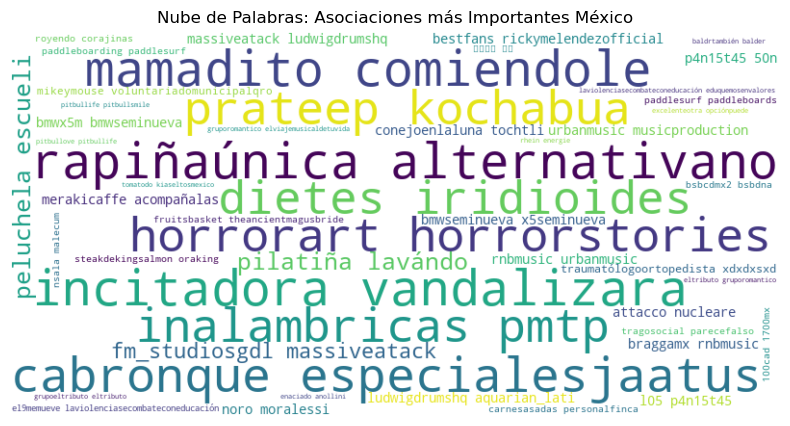

In [10]:
plot_word_cloud(mexico_associations, 'México')

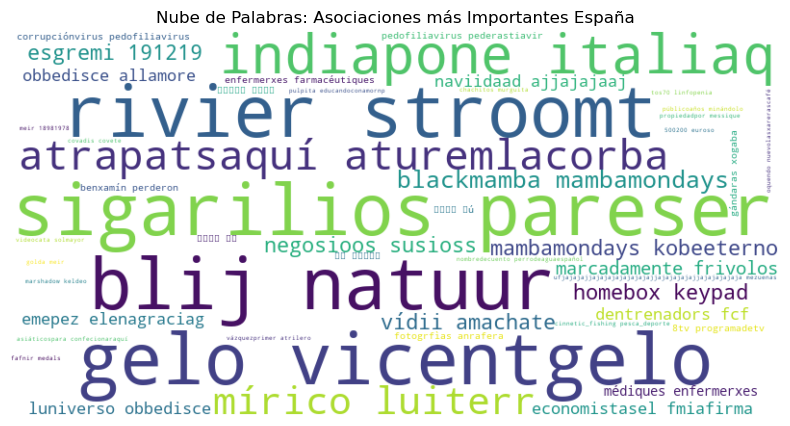

In [13]:
plot_word_cloud(spain_associations, 'España')

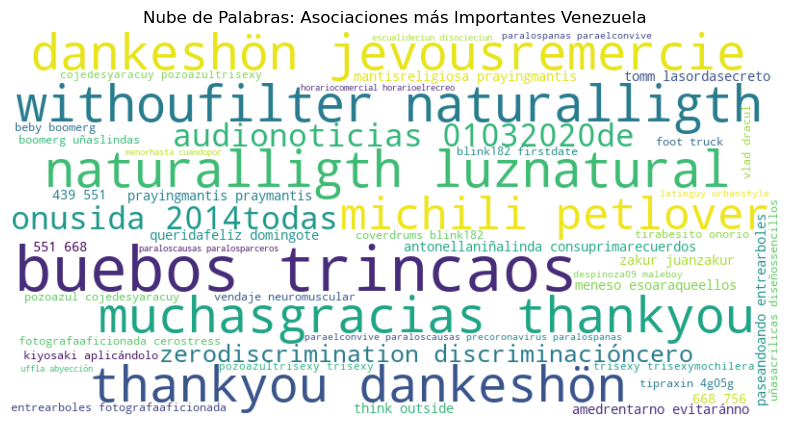

In [14]:
plot_word_cloud(venezuela_associations, 'Venezuela')

### Conclusiones:
Atacamos el problema de encontrar las asociaciones de palabras más significativas en conjuntos de datos de tweets para México, España y Venezuela utilizando la medida de información mutua. A través del preprocesamiento adecuado y el cálculo de la información mutua, se logró identificar las asociaciones más relevantes.

Las asociaciones de palabras más importantes revelanm patrones y temas específicos en cada conjunto de datos. Estas asociaciones pueden ser utilizadas para comprender mejor las discusiones y tendencias presentes en las redes sociales de cada país.

Este análisis de las asociaciones de palabras permite descubrir información valiosa, los resultados obtenidos en este estudio proporcionan una visión más profunda de los temas y patrones en los tweets de México, España y Venezuela. Este enfoque puede ser aplicado en diferentes dominios y conjuntos de datos para obtener información significativa y relevante.